In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
feature = np.asarray([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])

AND = np.asarray(['and', np.asarray([[0.],[0.],[0.],[1.]])])
NAND = np.asarray(['nand', np.asarray([[1.],[1.],[1.],[0.]])])
OR = np.asarray(['or', np.asarray([[0.],[1.],[1.],[1.]])])

In [0]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [0]:
def train_gate(name, target):
    losses = []
    accs = []

    # Build graph
    graph = tf.Graph()
    with graph.as_default():
        xs = tf.placeholder(dtype=tf.float32, shape=feature.shape)

        ys = tf.placeholder(dtype=tf.float32, shape=target.shape)

        ws_shape = (feature.shape[-1], 1)
        ws = tf.Variable(dtype=tf.float32, \
                            initial_value=tf.fill(ws_shape, 0.5))
        
        bs = tf.Variable(dtype=tf.float32, \
                            initial_value=0.5)

        logit = tf.matmul(xs, ws) + bs
        pred = sigmoid(logit)
        diff = pred - ys

        dw = tf.matmul(tf.transpose(xs), diff)
        db = tf.reduce_mean(diff)

        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=ys, logits=logit))
        acc = tf.reduce_mean(tf.cast(tf.equal(tf.cast(pred > 0.5, tf.float32), ys), tf.float32))

        lr = tf.placeholder_with_default(0.1, shape=[])
        step = [tf.assign_sub(ws, lr * dw), tf.assign_sub(bs, lr * db)]

        # Train
        sess = tf.Session(graph=graph)
        sess.run(tf.global_variables_initializer())

        steps = 100
        fetches = step
        feeds = {xs: feature, ys: target}
        
        for i in range(steps):
            _, lo, a = sess.run([step, loss, acc], feed_dict=feeds)
            accs.append(a)
            losses.append(lo)

    plt.plot(range(steps), losses)
    plt.plot(range(steps), accs)
    plt.title(name)
    plt.legend(['loss', 'accuracy'])

    plt.show()

    return sess.run([ws, bs])

W0816 08:20:40.476597 140519853823872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


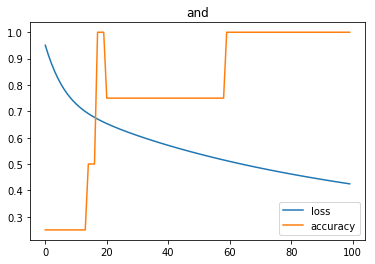

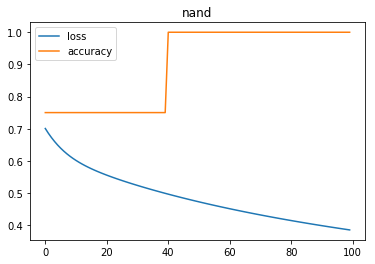

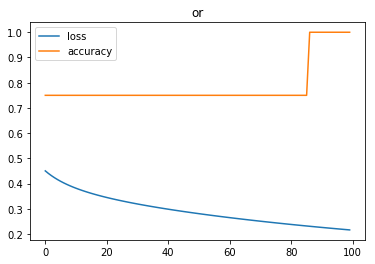

In [0]:
AND_w, AND_b = train_gate(*AND)
NAND_w, NAND_b = train_gate(*NAND)
OR_w, OR_b = train_gate(*OR)

In [0]:
def discretize(signal):
    if signal > 0:
        return 1
    else:
        return 0

In [0]:
def and_gate(signal_a, signal_b):
    signal = AND_w[0] * signal_a + AND_w[1] * signal_b + AND_b
    signal = discretize(signal)

    return signal

In [0]:
def nand_gate(signal_a, signal_b):
    signal = NAND_w[0] * signal_a + NAND_w[1] * signal_b + NAND_b
    signal = discretize(signal)

    return signal

In [0]:
def or_gate(signal_a, signal_b):
    signal = OR_w[0] * signal_a + OR_w[1] * signal_b + OR_b
    signal = discretize(signal)

    return signal

In [0]:
def xor_gate(signal_a, signal_b):
    return and_gate(nand_gate(signal_a, signal_b), or_gate(signal_b, signal_a))

In [0]:
def print_helper(func):
    for e in feature:
        print(func(*e), end='')

In [0]:
# 0001
print_helper(and_gate)

0001

In [0]:
# 1110
print_helper(nand_gate)

1110

In [0]:
# 0111
print_helper(or_gate)

0111

In [0]:
# 0110
print_helper(xor_gate)

0110